In [1]:
# Dependencies and Setup
# Pandas dependency
import pandas as pd

# Plotting dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Linear regression dependencies and statistical dependencies
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
diversity_raw_df = pd.read_csv("../Resources/Diversity_in_tech_companies.csv")

# Display sample data
diversity_raw_df.head(10)

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-
5,2018,HP,37,63,73,12,8,4,2,<1,-
6,2018,Indiegogo,50,50,58,28,7,4,-,3,-
7,2018,Nvidia,17,83,37,45,3,1,14,<1,-
8,2018,Dell,28,72,69,9,11,10,-,1,-
9,2018,Ingram Micro,31,69,52,14,19,14,1,0,-


In [3]:
# Examine data and datatypes
print(diversity_raw_df.shape)
print(diversity_raw_df.info())
print(diversity_raw_df.describe())

(94, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          94 non-null     int64 
 1   Company       94 non-null     object
 2   Female %      94 non-null     int64 
 3   Male %        94 non-null     int64 
 4   % White       94 non-null     int64 
 5   % Asian       94 non-null     object
 6   % Latino      94 non-null     object
 7   % Black       94 non-null     object
 8   % Multi       94 non-null     object
 9   % Other       93 non-null     object
 10  % Undeclared  94 non-null     object
dtypes: int64(4), object(7)
memory usage: 8.2+ KB
None
              Year   Female %     Male %    % White
count    94.000000  94.000000  94.000000  94.000000
mean   2016.106383  35.234043  64.744681  59.393617
std       1.432856   9.446426   9.464065   9.897559
min    2014.000000  16.000000  46.000000  37.000000
25%    2015.000000  29.0000

In [4]:
# Total number of copanies
# Unique companies
print(f"Total Tech companies: {diversity_raw_df.Company.nunique()}")
print(f"Tech companies: {diversity_raw_df.Company.unique()}")

Total Tech companies: 23
Tech companies: ['Yahoo!' 'Google' 'Apple' 'Cisco' 'eBay' 'HP' 'Indiegogo' 'Nvidia' 'Dell'
 'Ingram Micro' 'Intel' 'Groupon' 'Amazon' 'Etsy ' 'Microsoft'
 'Salesforce' 'Pandora' 'Uber' 'Slack' 'AirBnB ' 'Netflix' 'Yelp'
 'Apple (excluding undeclared)']


In [5]:
# Number of companies per year
diversity_raw_df.groupby("Year").Company.nunique()

Year
2014    17
2015    18
2016    19
2017    18
2018    22
Name: Company, dtype: int64

In [6]:
# Company names per year
pd.options.display.max_colwidth = 999
diversity_raw_df.groupby("Year").Company.unique()

Year
2014                  [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Salesforce, Pandora, Microsoft]
2015           [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora]
2016     [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber]
2017                                   [Yahoo!, Google, Apple, Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber]
2018    [Yahoo!, Google, Apple, Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber, Slack, AirBnB , Netflix, Yelp]
Name: Company, dtype: object

## Data cleaning    

In [7]:
# Remove rows with Company name as "Apple (excluding undeclared)" as this is a duplicate of "Apple"
diversity_raw_df = diversity_raw_df[diversity_raw_df.Company != "Apple (excluding undeclared)"]
print(diversity_raw_df.info())
diversity_raw_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          91 non-null     int64 
 1   Company       91 non-null     object
 2   Female %      91 non-null     int64 
 3   Male %        91 non-null     int64 
 4   % White       91 non-null     int64 
 5   % Asian       91 non-null     object
 6   % Latino      91 non-null     object
 7   % Black       91 non-null     object
 8   % Multi       91 non-null     object
 9   % Other       90 non-null     object
 10  % Undeclared  91 non-null     object
dtypes: int64(4), object(7)
memory usage: 8.5+ KB
None


,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-
5,2018,HP,37,63,73,12,8,4,2,<1,-
6,2018,Indiegogo,50,50,58,28,7,4,-,3,-
7,2018,Nvidia,17,83,37,45,3,1,14,<1,-
8,2018,Dell,28,72,69,9,11,10,-,1,-
9,2018,Ingram Micro,31,69,52,14,19,14,1,0,-


In [8]:
# Copy original DataFrame to avoid modifying it in case is needed later
df = diversity_raw_df.copy()
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


In [9]:
# If it id less than 1%, then change it to 0% (rounding down to 0%)
df.loc[df["% Other"] == "<1", "% Other"] = 0
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,0,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


In [10]:
# Convert "-" to 0
df.loc[df["% White"] == "-", "% White"] = 0 
df.loc[df["% Asian"] == "-", "% Asian"] = 0
df.loc[df["% Black"] == "-", "% Black"] = 0
df.loc[df["% Latino"] == "-", "% Latino"] = 0
df.loc[df["% Multi"] == "-", "% Multi"] = 0
df.loc[df["% Other"] == "-", "% Other"] = 0
df.loc[df["% Undeclared"] == "-", "% Undeclared"] = 0
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,0
1,2018,Google,31,69,53,36,4,3,4,0,0
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,0,0
4,2018,eBay,40,60,50,39,6,3,1,1,0


In [11]:

# Convert NaN to 0
df["% Other"] = df["% Other"].fillna(0)
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,0
1,2018,Google,31,69,53,36,4,3,4,0,0
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,0,0
4,2018,eBay,40,60,50,39,6,3,1,1,0


In [12]:
# Check the data types
df.dtypes

Year             int64
Company         object
Female %         int64
Male %           int64
% White          int64
% Asian         object
% Latino        object
% Black         object
% Multi         object
% Other         object
% Undeclared    object
dtype: object

In [13]:
# Convert percentage columns to float
df["Female %"] = df["Female %"].astype(float)
df["Male %"] = df["Male %"].astype(float)
df["% White"] = df["% White"].astype(float)
df["% Asian"] = df["% Asian"].astype(float)
df["% Black"] = df["% Black"].astype(float)
df["% Latino"] = df["% Latino"].astype(float)
df["% Multi"] = df["% Multi"].astype(float)
df["% Other"] = df["% Other"].astype(float)
df["% Undeclared"] = df["% Undeclared"].astype(float)

In [14]:
# Check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          91 non-null     int64  
 1   Company       91 non-null     object 
 2   Female %      91 non-null     float64
 3   Male %        91 non-null     float64
 4   % White       91 non-null     float64
 5   % Asian       91 non-null     float64
 6   % Latino      91 non-null     float64
 7   % Black       91 non-null     float64
 8   % Multi       91 non-null     float64
 9   % Other       91 non-null     float64
 10  % Undeclared  91 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 8.5+ KB


In [15]:
# Check percentage totals
df["Gender Total %"] = df["Female %"] + df["Male %"] 
df["Diversity Total %"] = df["% White"] + df["% Asian"] + df["% Black"] + df["% Latino"] + df["% Multi"] + df["% Other"] + df["% Undeclared"]
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               91 non-null     int64  
 1   Company            91 non-null     object 
 2   Female %           91 non-null     float64
 3   Male %             91 non-null     float64
 4   % White            91 non-null     float64
 5   % Asian            91 non-null     float64
 6   % Latino           91 non-null     float64
 7   % Black            91 non-null     float64
 8   % Multi            91 non-null     float64
 9   % Other            91 non-null     float64
 10  % Undeclared       91 non-null     float64
 11  Gender Total %     91 non-null     float64
 12  Diversity Total %  91 non-null     float64
dtypes: float64(11), int64(1), object(1)
memory usage: 10.0+ KB
None


,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
0,2018,Yahoo!,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
1,2018,Google,31.0,69.0,53.0,36.0,4.0,3.0,4.0,0.0,0.0,100.0,100.0
2,2018,Apple,32.0,68.0,54.0,21.0,13.0,9.0,3.0,1.0,2.0,100.0,103.0
3,2018,Cisco,24.0,76.0,53.0,37.0,5.0,4.0,1.0,0.0,0.0,100.0,100.0
4,2018,eBay,40.0,60.0,50.0,39.0,6.0,3.0,1.0,1.0,0.0,100.0,100.0
5,2018,HP,37.0,63.0,73.0,12.0,8.0,4.0,2.0,0.0,0.0,100.0,99.0
6,2018,Indiegogo,50.0,50.0,58.0,28.0,7.0,4.0,0.0,3.0,0.0,100.0,100.0
7,2018,Nvidia,17.0,83.0,37.0,45.0,3.0,1.0,14.0,0.0,0.0,100.0,100.0
8,2018,Dell,28.0,72.0,69.0,9.0,11.0,10.0,0.0,1.0,0.0,100.0,100.0
9,2018,Ingram Micro,31.0,69.0,52.0,14.0,19.0,14.0,1.0,0.0,0.0,100.0,100.0


In [16]:
print(df.shape)
print(df.info())

(91, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               91 non-null     int64  
 1   Company            91 non-null     object 
 2   Female %           91 non-null     float64
 3   Male %             91 non-null     float64
 4   % White            91 non-null     float64
 5   % Asian            91 non-null     float64
 6   % Latino           91 non-null     float64
 7   % Black            91 non-null     float64
 8   % Multi            91 non-null     float64
 9   % Other            91 non-null     float64
 10  % Undeclared       91 non-null     float64
 11  Gender Total %     91 non-null     float64
 12  Diversity Total %  91 non-null     float64
dtypes: float64(11), int64(1), object(1)
memory usage: 10.0+ KB
None


In [17]:
df.describe()

,Year,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,2016.142857,35.406593,64.571429,59.208791,22.637363,7.263736,5.461538,2.329670,1.241758,0.428571,99.978022,98.571429
std,1.434274,9.553333,9.570955,9.905685,11.994922,4.057463,4.316139,3.283139,1.344459,1.795939,0.209657,8.306815
min,2014.000000,16.000000,46.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,54.000000
25%,2015.000000,29.000000,57.000000,52.500000,12.500000,4.000000,2.000000,0.000000,0.000000,0.000000,100.000000,100.000000
50%,2016.000000,36.000000,64.000000,60.000000,22.000000,6.000000,4.000000,1.000000,1.000000,0.000000,100.000000,100.000000
75%,2017.000000,43.000000,71.000000,66.000000,31.000000,9.000000,8.000000,3.000000,2.000000,0.000000,100.000000,100.000000
max,2018.000000,54.000000,84.000000,79.000000,45.000000,19.000000,21.000000,14.000000,5.000000,13.000000,101.000000,103.000000


In [18]:
df.to_csv("Diversity_in_tech_companies_plotting.csv")

### Percentage difference from 100% can be attributed to rounding on percentages, or by Multi selecting already counted diversity

## Charts

In [19]:
diversity_colors = {'% White':'#EC111A', 
          '% Asian':'#F2609E', 
          '% Black':'#FFD42F', 
          '% Latino':'#138468', 
          '% Multi':'#009DD6', 
          '% Other':'#FB6330', 
          '% Undeclared':'#7849B8'}
gender_colors = ['lightblue', 'pink']

In [20]:
print(diversity_colors['% Asian'])

#F2609E


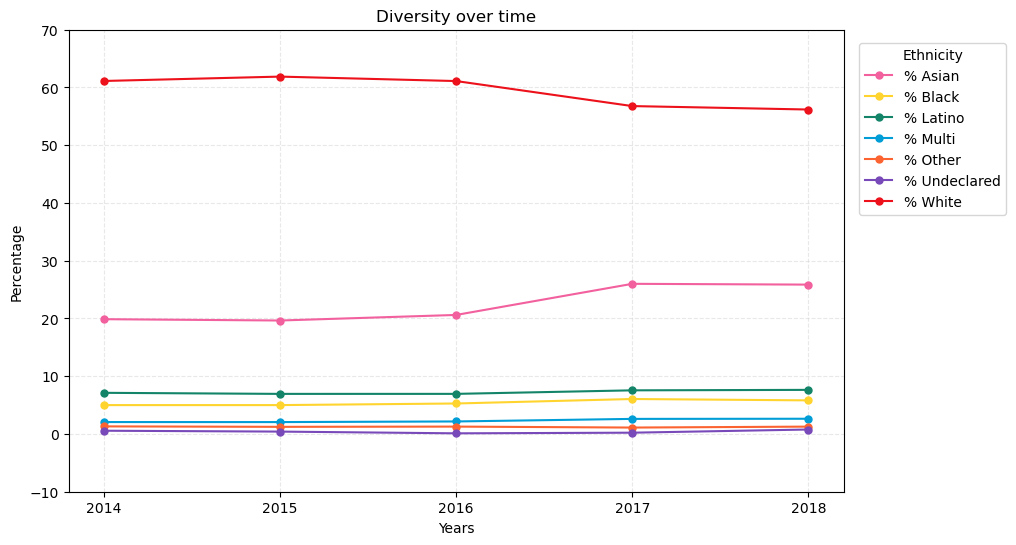

In [21]:
# Plot racial diversity over time
# 1. Get the data
pivot_df = df.pivot_table(index='Year', values=['% White', '% Asian', '% Latino', '% Black', '% Multi', '% Other', '% Undeclared'], aggfunc='mean') 
#colors = ['#7F4F24', '#936639', '#A68A64', '#B6AD90', '#C2C5AA', '#A4AC86', '#656D4A']

# 2. Make the canvas
plt.figure(figsize=(10, 6))

# 3. Plot the data
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column, marker='o', linestyle='-', markersize=5, color=diversity_colors[column])

plt.title('Diversity over time')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.xticks(pivot_df.index)
plt.yticks(range(-10, 71, 10))
plt.legend(title='Ethnicity', loc=(1.02, 0.6))
plt.grid(linestyle='--', alpha=0.5, color='lightgray')

# 4. Show/Save the plot
plt.show()

In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(gender, race, xlimits, ylimits, text_coordinates):
    
    # 1. Get the data
    x_values = df[f"{gender} %"]
    y_values = df[f"% {race}"]

    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # 2. Make the canvas
    plt.figure(figsize=(10,6))

    # 3. Make the scatter plot
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values, edgecolors='black', color=diversity_colors[f'% '+race])
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, (text_coordinates), fontsize=15, color="red")
    plt.title(f'Likelyhood of companies hiring {race} {gender} (Average Years and Companies)', fontsize=16, fontweight='bold', color='black')
    plt.xlabel(f'{gender} %')
    plt.ylabel(f'% {race}')
    plt.xlim(xlimits)
    plt.ylim(ylimits)
    plt.grid(linestyle='--', alpha=0.5, color='lightgray')

    print(f"The r-value is: {rvalue}")

    # 4. Save/Show the plot
    plt.show()

The r-value is: 0.5303890671662571


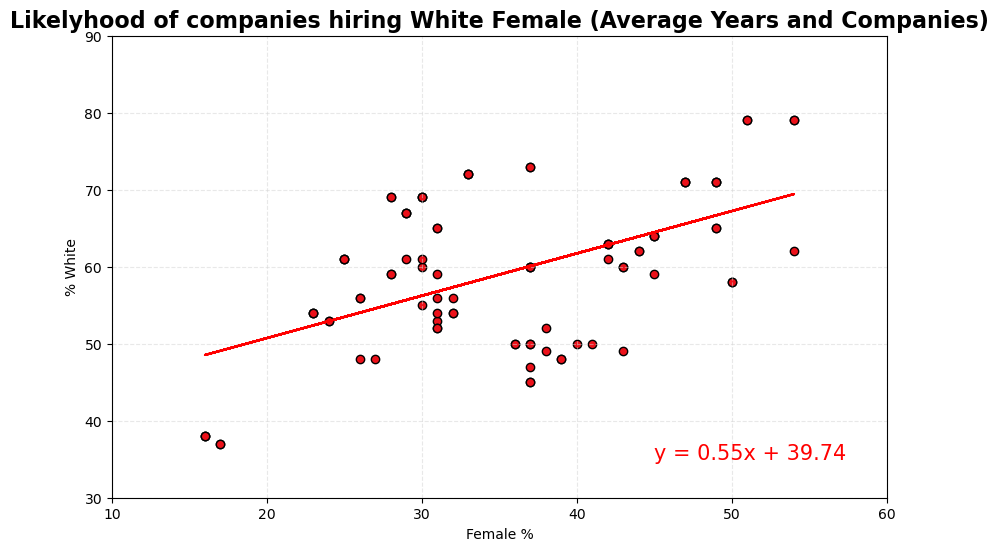

In [23]:
# Linear regression on Percentage of Females vs. Percentage of White
# 1. Get the data
gender = 'Female'
race = 'White'

plot_linear_regression(gender, race, (10,60), (30,90), (45,35))

The r-value is: -0.3324449484504086


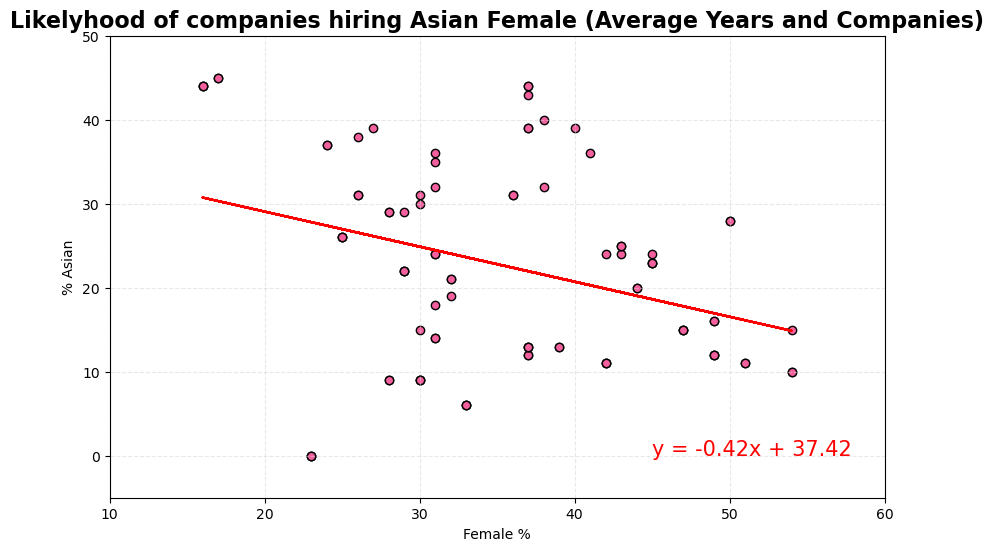

In [24]:
# Linear regression on Percentage of Females vs. Percentage of Asian
# 1. Get the data
gender = 'Female'
race = 'Asian'

plot_linear_regression(gender, race, (10,60), (-5,50), (45,0))

The r-value is: 0.12619415936237163


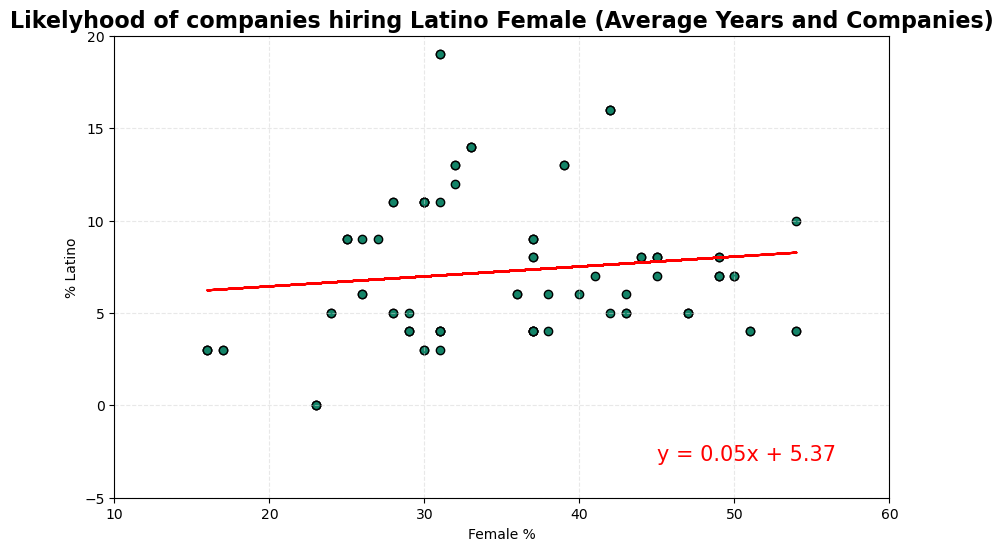

In [25]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Latino'

plot_linear_regression(gender, race, (10,60), (-5,20), (45,-3))

The r-value is: 0.129054411090084


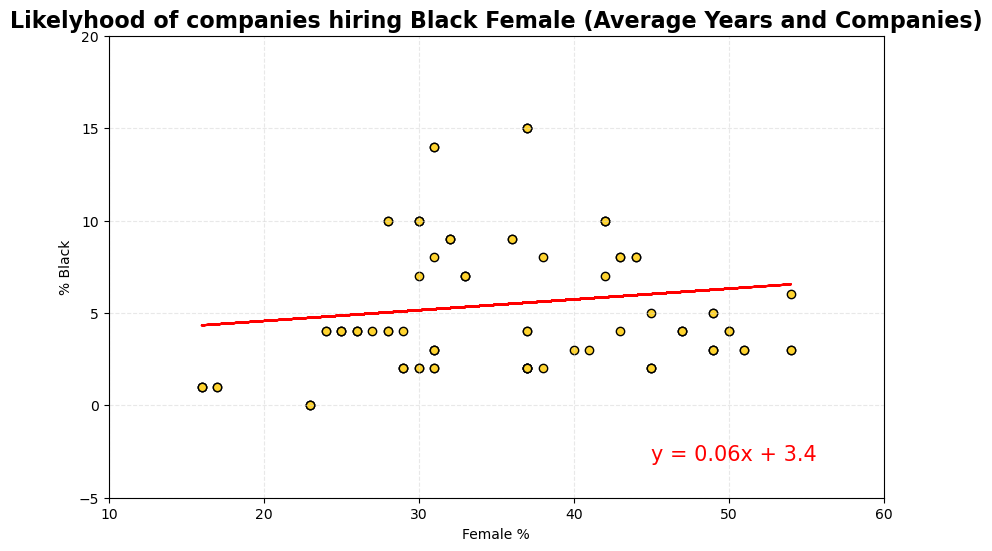

In [26]:
# Linear regression on Percentage of Females vs. Percentage of Black
# 1. Get the data
gender = 'Female'
race = 'Black'

plot_linear_regression(gender, race, (10,60), (-5,20), (45,-3))

The r-value is: -0.2827638422658497


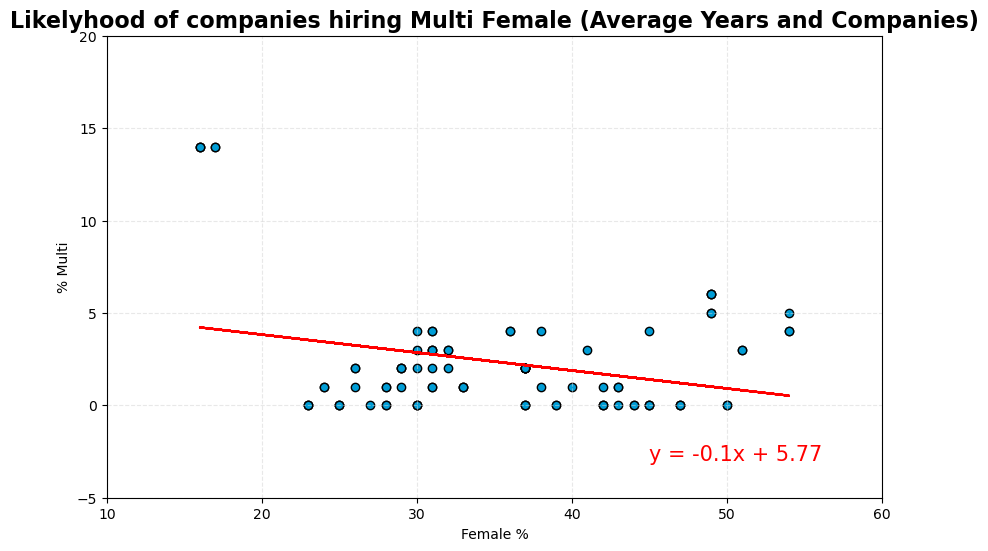

In [27]:
# Linear regression on Percentage of Females vs. Percentage of Multi
# 1. Get the data
gender = 'Female'
race = 'Multi'

plot_linear_regression(gender, race, (10,60), (-5,20), (45, -3))

The r-value is: 0.38500697865209366


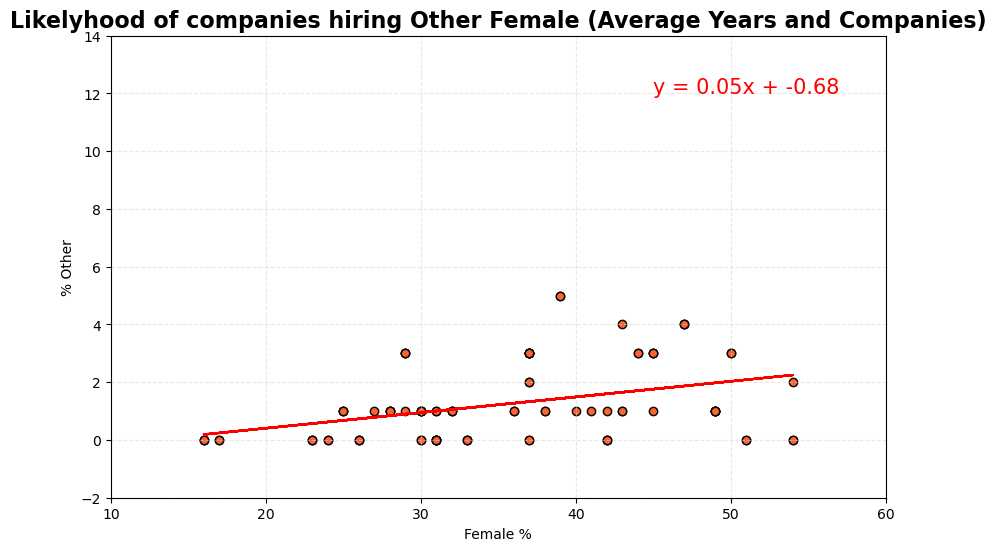

In [28]:
# Linear regression on Percentage of Females vs. Percentage of Other
# 1. Get the data
gender = 'Female'
race = 'Other'

plot_linear_regression(gender, race, (10,60), (-2,14), (45,12))

The r-value is: -0.008326365103854521


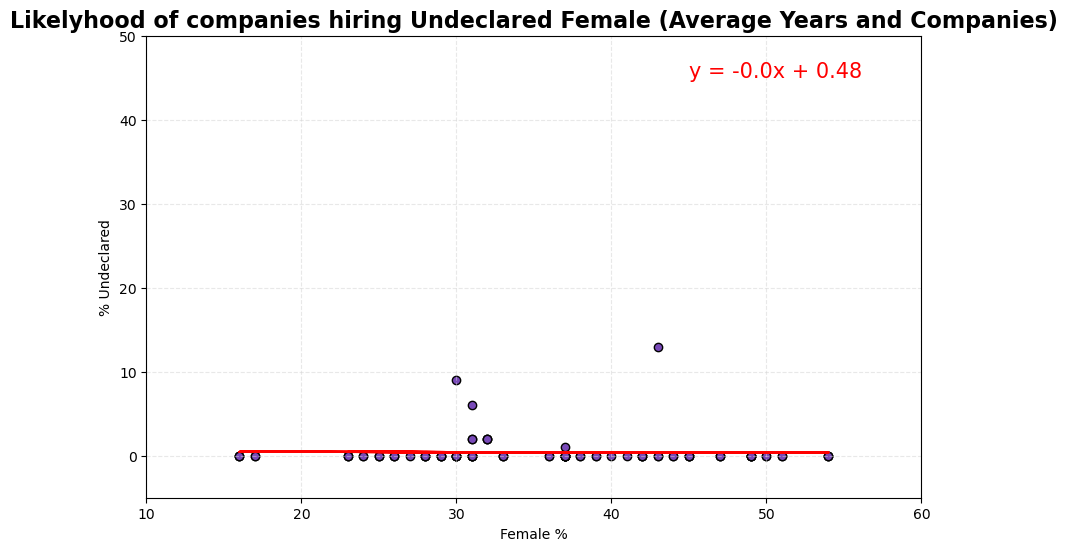

In [29]:
# Linear regression on Percentage of Females vs. Percentage of Multi
# 1. Get the data
gender = 'Female'
race = 'Undeclared'

plot_linear_regression(gender, race, (10,60), (-5,50), (45,45))

In [30]:
genders = ['Female', 'Male']
races = ['White', 'Asian', 'Latino', 'Black', 'Multi', 'Other', 'Undeclared']
coords = [[(40,40), (16,17), (16,17), (16,17), (12,40), (4,20), (10,40)],
          [(40,50), (50,0), (50,1), (50,17), (50,12), (4,70), (50,10)]]

The r-value is: -0.5271368626470714


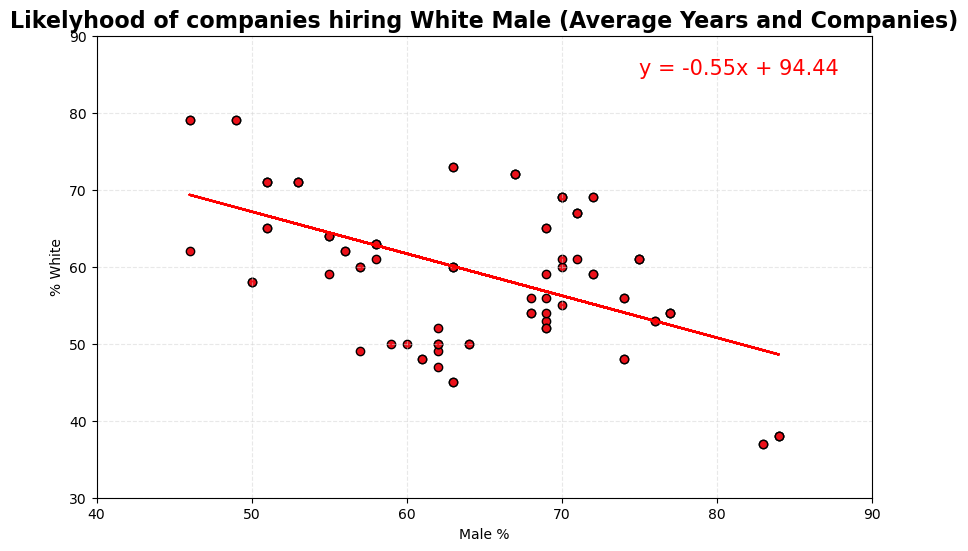

In [31]:
# Linear regression on Percentage of Males vs. Percentage of White
# 1. Get the data
gender = 'Male'
race = 'White'

plot_linear_regression(gender, race, (40,90), (30,90), (75,85))

The r-value is: 0.3282784446223


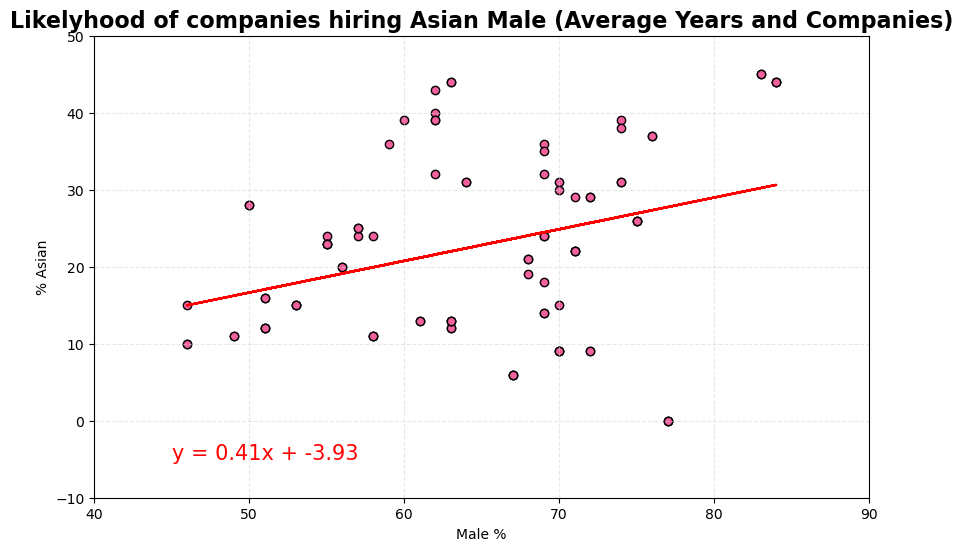

In [32]:
# Linear regression on Percentage of Males vs. Percentage of Asian
# 1. Get the data
gender = 'Male'
race = 'Asian'

plot_linear_regression(gender, race, (40,90), (-10,50), (45,-5))

The r-value is: -0.12266358296281023


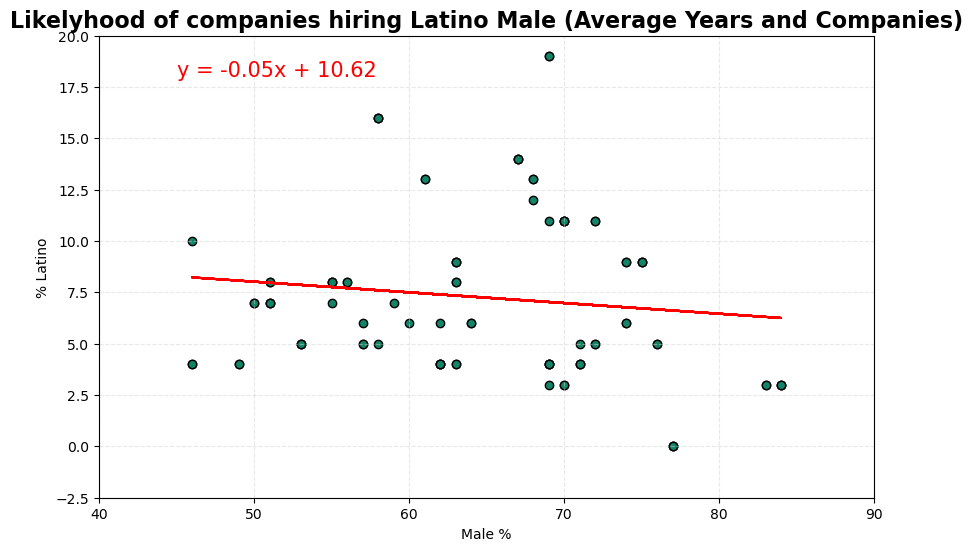

In [33]:
# Linear regression on Percentage of Males vs. Percentage of Latinos
# 1. Get the data
gender = 'Male'
race = 'Latino'

plot_linear_regression(gender, race, (40,90), (-2.5,20), (45,18))

The r-value is: -0.12641674892350707


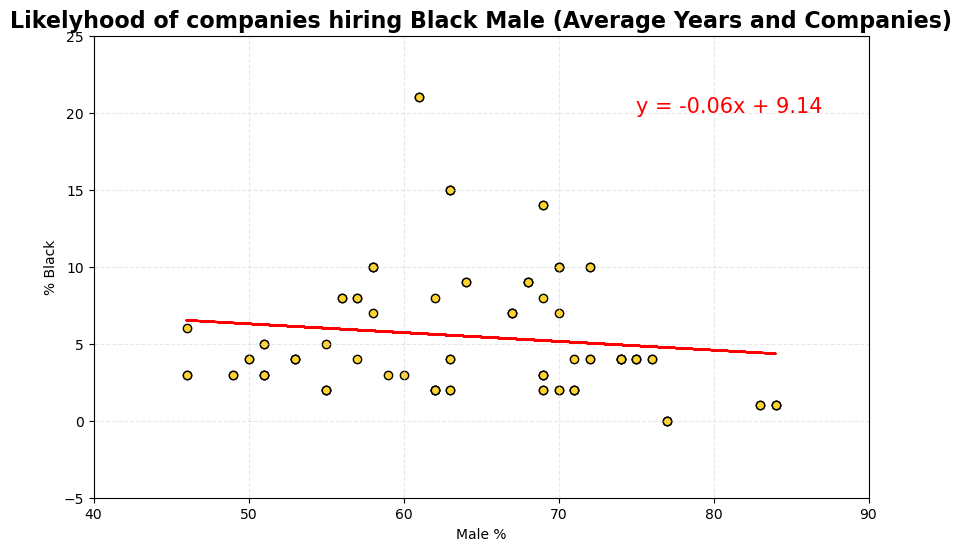

In [34]:
# Linear regression on Percentage of Males vs. Percentage of Black
# 1. Get the data
gender = 'Male'
race = 'Black'

plot_linear_regression(gender, race, (40,90), (-5,25), (75,20))

The r-value is: 0.2817691790773232


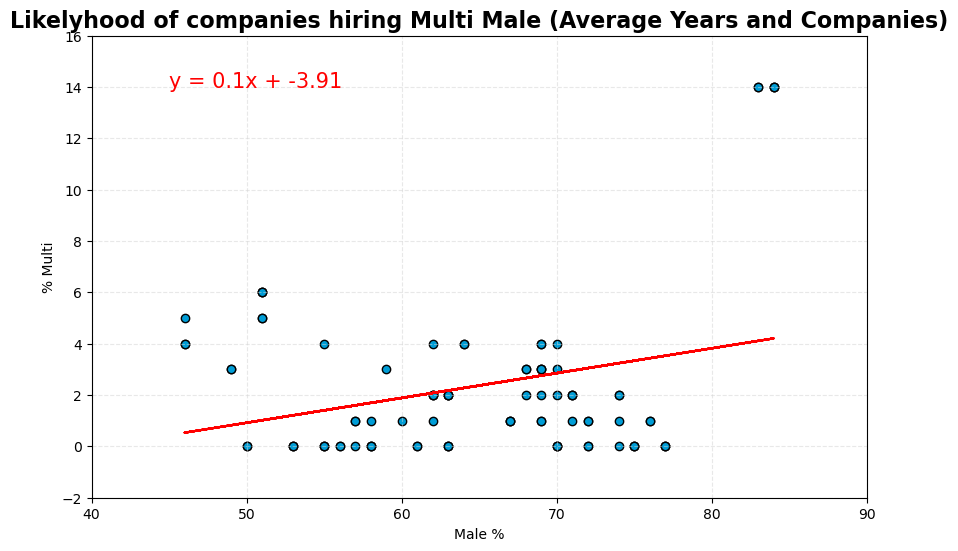

In [35]:
# Linear regression on Percentage of Males vs. Percentage of Multi
# 1. Get the data
gender = 'Male'
race = 'Multi'

plot_linear_regression(gender, race, (40,90), (-2,16), (45,14))

The r-value is: -0.3873345601229458


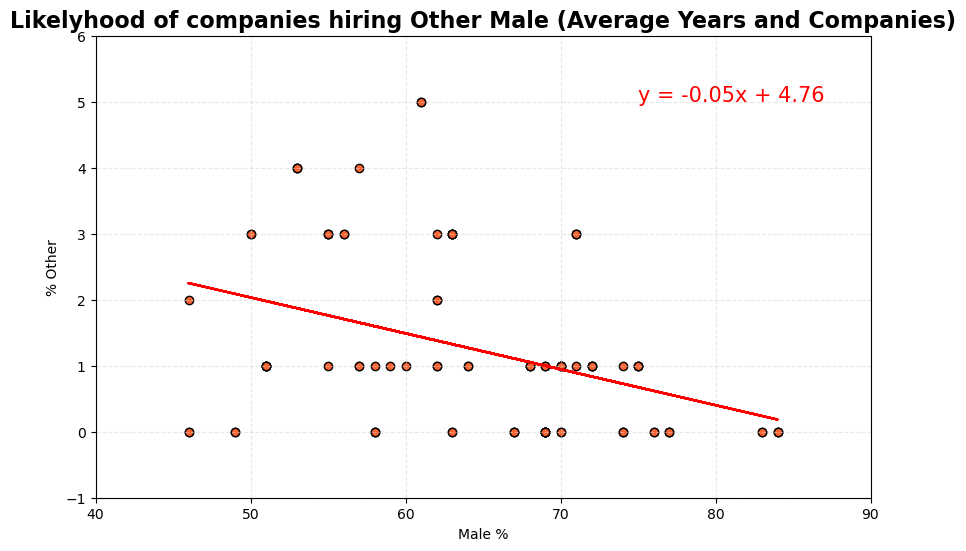

In [36]:
# Linear regression on Percentage of Males vs. Percentage of Other
# 1. Get the data
gender = 'Male'
race = 'Other'

plot_linear_regression(gender, race, (40,90), (-1,6), (75,5))

The r-value is: 0.008218690341416096


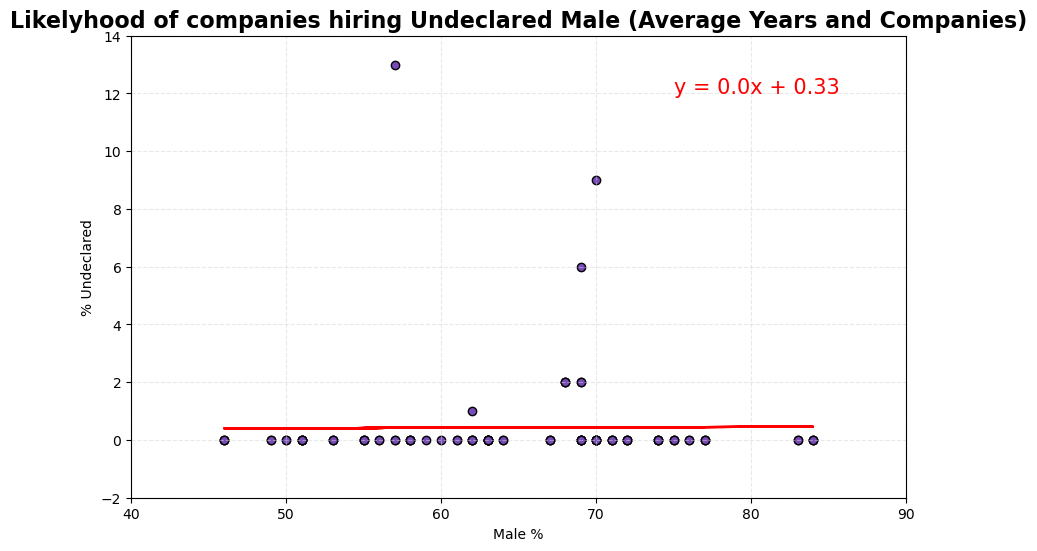

In [37]:
# Linear regression on Percentage of Males vs. Percentage of Undeclared
# 1. Get the data
gender = 'Male'
race = 'Undeclared'

plot_linear_regression(gender, race, (40,90), (-2,14), (75,12))

### Average comparison of gender across all years and all companies

In [38]:
df.describe()

,Year,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,2016.142857,35.406593,64.571429,59.208791,22.637363,7.263736,5.461538,2.329670,1.241758,0.428571,99.978022,98.571429
std,1.434274,9.553333,9.570955,9.905685,11.994922,4.057463,4.316139,3.283139,1.344459,1.795939,0.209657,8.306815
min,2014.000000,16.000000,46.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,54.000000
25%,2015.000000,29.000000,57.000000,52.500000,12.500000,4.000000,2.000000,0.000000,0.000000,0.000000,100.000000,100.000000
50%,2016.000000,36.000000,64.000000,60.000000,22.000000,6.000000,4.000000,1.000000,1.000000,0.000000,100.000000,100.000000
75%,2017.000000,43.000000,71.000000,66.000000,31.000000,9.000000,8.000000,3.000000,2.000000,0.000000,100.000000,100.000000
max,2018.000000,54.000000,84.000000,79.000000,45.000000,19.000000,21.000000,14.000000,5.000000,13.000000,101.000000,103.000000


In [39]:
print(f"Female variance: {df['Female %'].var()}")
print(f"Male variance: {df['Male %'].var()}")

Female variance: 91.26617826617827
Male variance: 91.60317460317455


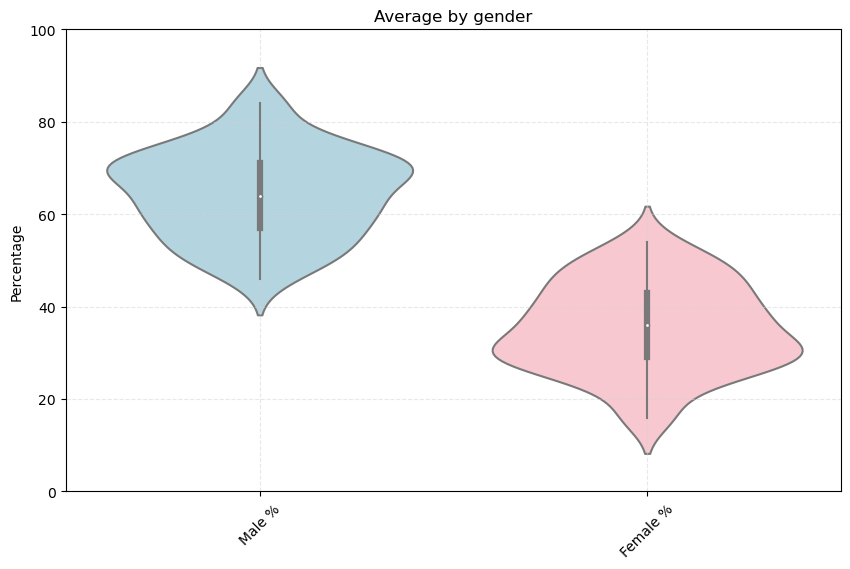

In [40]:
# Comparason of gender using a violin plot
# 1. Get the data
gender_df = df[['Male %','Female %']]

# 2. Make the canvas
plt.figure(figsize=(10, 6))

# 3. Plot the data
sns.violinplot(data=gender_df, palette=gender_colors)
plt.title('Average by gender')
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.5, color='lightgray')

# 4. Show/Save the plot
plt.show()

In [41]:
# FULL HYPOTHESIS

# NULL: THERE IS NO DIFFERENCE BETWEEN MALES VS FEMALES WORKING IN TECH COMPANIES
# ALTERNATIVE: THERE IS A DIFFERENCE BETWEEN MALES VS FEMALES WORKING IN TECH COMPANIES

# BASED ON MY EXPECTATIONS - I EXPECT SIGNIFICANT DIFFERENCE BETWEEN MALES VS FEMALE WORKING IN TECH COMPANIES

### Average comparison of diversity across all years and all companies

In [42]:
males = df['Male %']
females = df['Female %']

stats.ttest_ind(males, females, equal_var = False)

TtestResult(statistic=20.573574726611028, pvalue=3.78484545338512e-49, df=179.9993887209176)

In [43]:
# I REJECT THE NULL HYPOTHESIS AND ACCEPT THE ALTERNATIVE - THERE IS A SIGNIFICANT DIFFERENCE BETWEEN MALES AND FEMALE WORKING IN TECH COMPANIES

In [44]:
diversity_df = df[['% White', '% Asian', '% Black', '% Latino', '% Multi', '% Other', '% Undeclared']]
diversity_df.head()

,% White,% Asian,% Black,% Latino,% Multi,% Other,% Undeclared
0,45.0,44.0,2.0,4.0,2.0,3.0,0.0
1,53.0,36.0,3.0,4.0,4.0,0.0,0.0
2,54.0,21.0,9.0,13.0,3.0,1.0,2.0
3,53.0,37.0,4.0,5.0,1.0,0.0,0.0
4,50.0,39.0,3.0,6.0,1.0,1.0,0.0


In [45]:
diversity_df.describe()

,% White,% Asian,% Black,% Latino,% Multi,% Other,% Undeclared
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,59.208791,22.637363,5.461538,7.263736,2.329670,1.241758,0.428571
std,9.905685,11.994922,4.316139,4.057463,3.283139,1.344459,1.795939
min,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.500000,12.500000,2.000000,4.000000,0.000000,0.000000,0.000000
50%,60.000000,22.000000,4.000000,6.000000,1.000000,1.000000,0.000000
75%,66.000000,31.000000,8.000000,9.000000,3.000000,2.000000,0.000000
max,79.000000,45.000000,21.000000,19.000000,14.000000,5.000000,13.000000


In [46]:
print(f"White variance: {df['% White'].var()}")
print(f"Asian variance: {df['% Asian'].var()}")
print(f"Black variance: {df['% Black'].var()}")
print(f"Latino variance: {df['% Latino'].var()}")
print(f"Multi variance: {df['% Multi'].var()}")
print(f"Other variance: {df['% Other'].var()}")
print(f"Undeclared variance: {df['% Undeclared'].var()}")

White variance: 98.12258852258854
Asian variance: 143.87814407814403
Black variance: 18.629059829059834
Latino variance: 16.463003663003658
Multi variance: 10.77899877899878
Other variance: 1.807570207570206
Undeclared variance: 3.22539682539682


In [47]:
diversity_colors_lst = diversity_colors.values()
diversity_colors_lst

dict_values(['#EC111A', '#F2609E', '#FFD42F', '#138468', '#009DD6', '#FB6330', '#7849B8'])

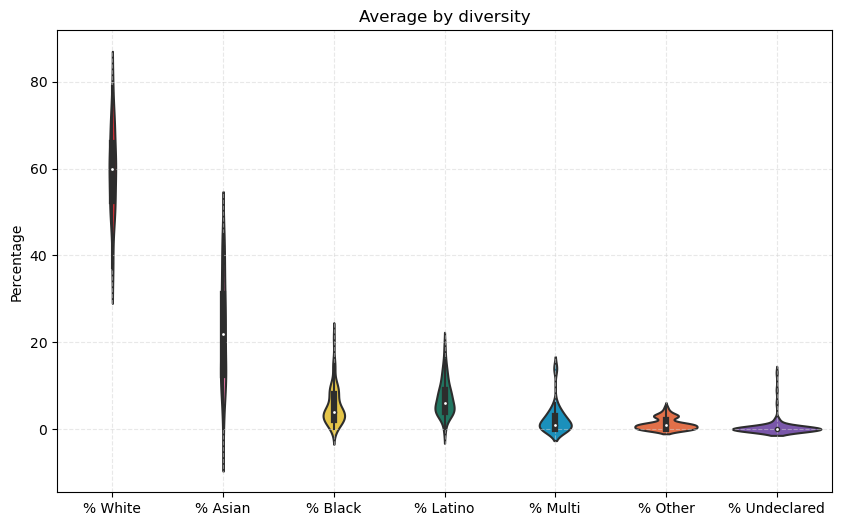

In [48]:
# Comparason of diversity using a violin plot
# 1. Get the data
## Using the diversity_df dataframe created above

# 2. Make the canvas
plt.figure(figsize=(10, 6))

# 3. Plot the data
sns.violinplot(data=diversity_df, palette=diversity_colors_lst)
plt.title('Average by diversity')
plt.ylabel("Percentage")
#plt.ylim(-10, 100)
plt.grid(linestyle='--', alpha=0.5, color='lightgray')

# 4. Show/Save the plot
plt.show()

In [49]:
# FULL HYPOTHESIS

# NULL: THERE IS NO DIFFERENCE OF AVERAGES BETWEEN ANY DIVERSITY GROUP
# ALTERNATIVE: THERE IS AT LEAST ONE DIFFERENCE BETWEEN DIVERSITY GROUPS

In [50]:
# Performe the ANOVA test
stats.f_oneway(diversity_df['% White'], 
               diversity_df['% Asian'], 
               diversity_df['% Black'], 
               diversity_df['% Latino'], 
               diversity_df['% Multi'], 
               diversity_df['% Other'], 
               diversity_df['% Undeclared']
               )

F_onewayResult(statistic=985.8325475532455, pvalue=2.47133054e-316)

In [51]:
# WE REJECT THE NULL AND ACCEPT THE ALTERNATIVE - AT LEAST ONE DIVERSITY GROUP IS DIFFERENT

In [52]:
print(f"White vs Asian: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Asian'], equal_var = False)}")
print(f"White vs Black: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Black'], equal_var = False)}")
print(f"White vs Latino: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Latino'], equal_var = False)}")
print(f"White vs Multi: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Multi'], equal_var = False)}")
print(f"White vs Other: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Other'], equal_var = False)}")
print(f"White vs Undeclared: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Undeclared'], equal_var = False)}")

White vs Asian: TtestResult(statistic=22.426127199064165, pvalue=3.4974324485005776e-53, df=173.78741107942048)
White vs Black: TtestResult(statistic=47.45100949423269, pvalue=6.374334017920352e-81, df=122.98495278778121)
White vs Latino: TtestResult(statistic=46.29135565132039, pvalue=4.13282193180125e-78, df=119.3735241720709)
White vs Multi: TtestResult(statistic=51.99438750290772, pvalue=4.870119400677852e-79, df=109.537654889487)
White vs Other: TtestResult(statistic=55.316345330041564, pvalue=3.910652332452989e-73, df=93.31475419432466)
White vs Undeclared: TtestResult(statistic=55.69860802269435, pvalue=7.557267383459079e-75, df=95.9104106591678)


In [53]:
print(f"Asian vs Black: {stats.ttest_ind(diversity_df['% Asian'], diversity_df['% Black'], equal_var = False)}")
print(f"Asian vs Latino: {stats.ttest_ind(diversity_df['% Asian'], diversity_df['% Latino'], equal_var = False)}")
print(f"Asian vs Multi: {stats.ttest_ind(diversity_df['% Asian'], diversity_df['% Multi'], equal_var = False)}")
print(f"Asian vs Other: {stats.ttest_ind(diversity_df['% Asian'], diversity_df['% Other'], equal_var = False)}")
print(f"Asian vs Undeclared: {stats.ttest_ind(diversity_df['% Asian'], diversity_df['% Undeclared'], equal_var = False)}")

Asian vs Black: TtestResult(statistic=12.852924987195221, pvalue=7.644253536628321e-24, df=112.92177336927801)
Asian vs Latino: TtestResult(statistic=11.581759018419703, pvalue=8.827328477772503e-21, df=110.3300092458146)
Asian vs Multi: TtestResult(statistic=15.577446894105972, pvalue=6.992841235175281e-29, df=103.40989499464588)
Asian vs Other: TtestResult(statistic=16.909733828894062, pvalue=5.166342130749162e-30, df=92.26101951932218)
Asian vs Undeclared: TtestResult(statistic=17.467632811843643, pvalue=2.8276886801936257e-31, df=94.03313383302206)


In [54]:
print(f"Black vs Latino: {stats.ttest_ind(diversity_df['% Black'], diversity_df['% Latino'], equal_var = False)}")
print(f"Black vs Multi: {stats.ttest_ind(diversity_df['% Black'], diversity_df['% Multi'], equal_var = False)}")
print(f"Black vs Other: {stats.ttest_ind(diversity_df['% Black'], diversity_df['% Other'], equal_var = False)}")
print(f"Black vs Undeclared: {stats.ttest_ind(diversity_df['% Black'], diversity_df['% Undeclared'], equal_var = False)}")

Black vs Latino: TtestResult(statistic=-2.9021422691618346, pvalue=0.004171105579260181, df=179.31680824799332)
Black vs Multi: TtestResult(statistic=5.509231046627633, pvalue=1.3317013546634914e-07, df=168.02727152668047)
Black vs Other: TtestResult(statistic=8.904425131520638, pvalue=1.4956780083145585e-14, df=107.30242991242221)
Black vs Undeclared: TtestResult(statistic=10.270102429424778, pvalue=3.7853392676111054e-18, df=120.25779691951077)


In [55]:
print(f"Latino vs Multi: {stats.ttest_ind(diversity_df['% Latino'], diversity_df['% Multi'], equal_var = False)}")
print(f"Latino vs Other: {stats.ttest_ind(diversity_df['% Latino'], diversity_df['% Other'], equal_var = False)}")
print(f"Latino vs Undeclared: {stats.ttest_ind(diversity_df['% Latino'], diversity_df['% Undeclared'], equal_var = False)}")

Latino vs Multi: TtestResult(statistic=9.017914867341968, pvalue=3.608912970795619e-16, df=172.49074872237733)
Latino vs Other: TtestResult(statistic=13.439520313134684, pvalue=6.477281620974978e-25, df=109.52785001293975)
Latino vs Undeclared: TtestResult(statistic=14.69482678067052, pvalue=6.301597651996616e-29, df=123.96164151053163)


In [56]:
print(f"Multi vs Other: {stats.ttest_ind(diversity_df['% Multi'], diversity_df['% Other'], equal_var = False)}")
print(f"Multi vs Undeclared: {stats.ttest_ind(diversity_df['% Multi'], diversity_df['% Undeclared'], equal_var = False)}")

Multi vs Other: TtestResult(statistic=2.92523538481525, pvalue=0.004120717814921395, df=119.35924965926462)
Multi vs Undeclared: TtestResult(statistic=4.846109485972371, pvalue=3.3103904655276187e-06, df=139.43501659992066)


In [57]:
print(f"Other vs Undeclared: {stats.ttest_ind(diversity_df['% Other'], diversity_df['% Undeclared'], equal_var = False)}")

Other vs Undeclared: TtestResult(statistic=3.457792920018384, pvalue=0.0006911859728477218, df=166.76559172686433)
